<a href="https://colab.research.google.com/github/ahmedaashraf/Movie-Review-Classification/blob/master/MovieReviewClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
from tensorflow import keras
from keras.datasets import imdb
import numpy as np

(X_train,y_train) , (X_test,y_test)  = imdb.load_data (num_words=10000)



Using TensorFlow backend.


In [3]:
X_train.shape

(25000,)

In [0]:
from sklearn.model_selection import train_test_split

features = np.concatenate((X_train,X_test),axis=0)
label = np.concatenate((y_train,y_test),axis=0)

features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=42)


In [5]:
features.shape

(50000,)

In [6]:
print (features[0])

print (len(features[0]))
print (len(features[1]))

# Checking out the data
# the size of each sample is different so padding 
# will be performed by adding a dumy word to the text

 # word index returnes the number corresponds to the word word_imdex["the"] = #
word_index = imdb.get_word_index()
 # the following transforms  {'a': 0 , 'b' : 1} tp {0:'a' , 1:'b'}

valkey_reverse = dict((value, key) for key, value in word_index.items())

def decode(review):  # This function transforms the numeric list into the actual review
    text = ' '
    text = text.join(valkey_reverse[i] for i in review if i!=0) # remove 0
    return text

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218
189


In [7]:
from keras.preprocessing.sequence import pad_sequences
features = pad_sequences(features, padding = 'post', maxlen = 256)
features_train = pad_sequences(features_train, padding = 'post', maxlen = 256)
features_test = pad_sequences(features_test, padding = 'post', maxlen = 256)

print(len(features_train[0]))
print (len(features_test[0]))
decode (features[0])


256
256


"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [8]:
decode(features[15])

"the is rate hope br my out double this is again overwhelming country known portrayed desperation memories is sissy teaches anyway standard planet poem late applaud to performance not his there's is carrey and just being film jerry in jerry baby occupied to murders this is and to have into one as fall issues but is on was had can't is dark some br of needed based just table and incarnation of little with barely may prepare to country presentation don't plot and he 12 in could is blow opportunity lie wood are is late helps ii wanted not nothing from lost and i'm and jenny as with keep but and sinking that effects just is remember b was off use of and merely spacey this of ultimate old"

In [0]:
# identify the model's characterstics

activation1 = 'relu'
activation2 = 'sigmoid'
activation3 = 'softmax'
optimizer_ = 'adam'
loss_ = 'binary_crossentropy'

from keras.models import Sequential
from keras.layers import Embedding , Dense , GlobalAveragePooling1D , Dropout , Flatten
from keras.metrics import Recall , Precision
from keras import regularizers
from sklearn.model_selection import StratifiedKFold # using cross-validation to avoid overfitting
import pandas as pd


In [12]:
model = Sequential([
    
    Embedding(10000,16, activity_regularizer= regularizers.l1(1e-5)),
    GlobalAveragePooling1D(),
    Dense(16,activation=activation1 ,activity_regularizer=regularizers.l1(1e-5)),
    Dropout(0.5),
    Dense(16,activation=activation1),
    Dense(1,activation=activation2),

])

model.compile(
    
    optimizer=optimizer_,
    loss = loss_,
    metrics = ['acc']

)

model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,561
Trainable params: 160,561
Non-trainable params: 0
________________________________________________

Fold #1


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 30000 samples, validate on 10000 samples
Epoch 1/20
30000/30000 [==============================] - 6s 188us/step - loss: 0.5419 - acc: 0.7078 - val_loss: 0.3199 - val_acc: 0.8797
Epoch 2/20
30000/30000 [==============================] - 5s 170us/step - loss: 0.2983 - acc: 0.9003 - val_loss: 0.3123 - val_acc: 0.8845
Epoch 3/20
30000/30000 [==============================] - 5s 172us/step - loss: 0.2485 - acc: 0.9225 - val_loss: 0.3408 - val_acc: 0.8822
Epoch 4/20
30000/30000 [==============================] - 5s 170us/step - loss: 0.2205 - acc: 0.9344 - val_loss: 0.3444 - val_acc: 0.8810
Epoch 5/20
30000/30000 [==============================] - 5s 171us/step - loss: 0.2017 - acc: 0.9416 - val_loss: 0.3815 - val_acc: 0.8752
Epoch 6/20
30000/30000 [==============================] - 5s 171us/step - loss: 0.1893 - acc: 0.9449 - val_loss: 0.3812 - val_acc: 0.8755
Epoch 7/20
30000/30000 [==============================] - 5s 178us/step - loss: 0.1702 - acc: 0.9522 - val_loss: 0.4091 - 

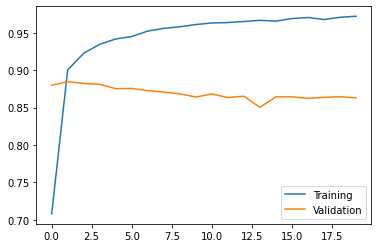

Fold #2
Train on 30000 samples, validate on 10000 samples
Epoch 1/20
30000/30000 [==============================] - 5s 170us/step - loss: 0.2535 - acc: 0.9310 - val_loss: 0.1276 - val_acc: 0.9758
Epoch 2/20
30000/30000 [==============================] - 5s 165us/step - loss: 0.2057 - acc: 0.9433 - val_loss: 0.1366 - val_acc: 0.9631
Epoch 3/20
30000/30000 [==============================] - 5s 173us/step - loss: 0.1877 - acc: 0.9488 - val_loss: 0.1365 - val_acc: 0.9620
Epoch 4/20
30000/30000 [==============================] - 5s 172us/step - loss: 0.1755 - acc: 0.9510 - val_loss: 0.1513 - val_acc: 0.9536
Epoch 5/20
30000/30000 [==============================] - 5s 176us/step - loss: 0.1646 - acc: 0.9554 - val_loss: 0.1747 - val_acc: 0.9445
Epoch 6/20
30000/30000 [==============================] - 5s 169us/step - loss: 0.1561 - acc: 0.9576 - val_loss: 0.1866 - val_acc: 0.9394
Epoch 7/20
30000/30000 [==============================] - 5s 172us/step - loss: 0.1482 - acc: 0.9598 - val_loss: 0

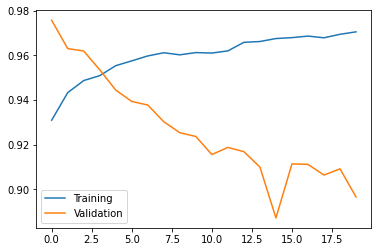

Fold #3
Train on 30000 samples, validate on 10000 samples
Epoch 1/20
30000/30000 [==============================] - 5s 170us/step - loss: 0.2011 - acc: 0.9412 - val_loss: 0.0960 - val_acc: 0.9794
Epoch 2/20
30000/30000 [==============================] - 5s 171us/step - loss: 0.1644 - acc: 0.9526 - val_loss: 0.1073 - val_acc: 0.9774
Epoch 3/20
30000/30000 [==============================] - 5s 170us/step - loss: 0.1525 - acc: 0.9549 - val_loss: 0.1160 - val_acc: 0.9703
Epoch 4/20
30000/30000 [==============================] - 5s 165us/step - loss: 0.1447 - acc: 0.9577 - val_loss: 0.1223 - val_acc: 0.9653
Epoch 5/20
30000/30000 [==============================] - 5s 167us/step - loss: 0.1348 - acc: 0.9613 - val_loss: 0.1332 - val_acc: 0.9630
Epoch 6/20
30000/30000 [==============================] - 5s 166us/step - loss: 0.1330 - acc: 0.9611 - val_loss: 0.1474 - val_acc: 0.9587
Epoch 7/20
30000/30000 [==============================] - 5s 175us/step - loss: 0.1292 - acc: 0.9630 - val_loss: 0

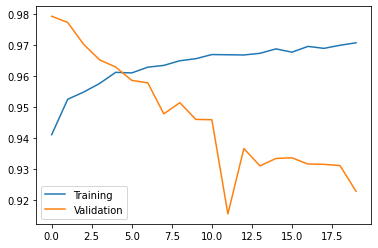

Fold #4
Train on 30000 samples, validate on 10000 samples
Epoch 1/20
30000/30000 [==============================] - 5s 164us/step - loss: 0.1794 - acc: 0.9482 - val_loss: 0.1173 - val_acc: 0.9692
Epoch 2/20
30000/30000 [==============================] - 5s 170us/step - loss: 0.1462 - acc: 0.9568 - val_loss: 0.0959 - val_acc: 0.9790
Epoch 3/20
30000/30000 [==============================] - 5s 171us/step - loss: 0.1339 - acc: 0.9611 - val_loss: 0.1000 - val_acc: 0.9753
Epoch 4/20
30000/30000 [==============================] - 5s 168us/step - loss: 0.1276 - acc: 0.9628 - val_loss: 0.1187 - val_acc: 0.9701
Epoch 5/20
30000/30000 [==============================] - 5s 172us/step - loss: 0.1245 - acc: 0.9621 - val_loss: 0.1175 - val_acc: 0.9690
Epoch 6/20
30000/30000 [==============================] - 5s 170us/step - loss: 0.1211 - acc: 0.9643 - val_loss: 0.1218 - val_acc: 0.9663
Epoch 7/20
30000/30000 [==============================] - 5s 168us/step - loss: 0.1177 - acc: 0.9650 - val_loss: 0

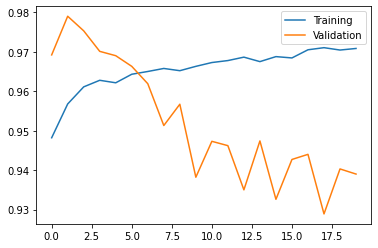

In [13]:
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

fold_num = 4

skf = StratifiedKFold(fold_num, shuffle=True, random_state=42) 
fold = 0

accu = []


for train, test in skf.split(features_train,label_train,groups=None):  
    fold+=1
    print(f"Fold #{fold}")
        
    features_train_ = features_train[train]
    label_train_ = label_train[train]
    features_test_ = features_train[test]
    label_test_ = label_train[test]

    
    E = 20
    h = model.fit(
        features_train_, label_train_,
        validation_data=(features_test_,label_test_),
        epochs = E,
    )

    accu.append(h.history['val_acc'])

    plt.plot(range(E), h.history['acc'], label = 'Training')
    plt.plot(range(E), h.history['val_acc'], label = 'Validation')
    plt.legend()
    plt.show()

In [14]:
len = 0
sum = 0.0
for i in accu:
  sum += i[0]
  len+=1

print("{} Fold Accuracy : ".format(fold_num) , sum/len)



4 Fold Accuracy :  0.9510249942541122


In [15]:
loss, acc = model.evaluate(features_test, label_test)
print('Test set accuracy: ', acc * 100)

10000/10000 [==============================] - 0s 40us/step
Test set accuracy:  86.72999739646912


In [38]:
def encode (review):
  new_review = []
  for i in review:
    new_review.append(word_index[i])
  return new_review

new_rev = "sad"
test = encode(new_rev.split())
test2 = np.array(test)
tryf = decode(features[99])
print(test)
print(tryf)

prediction = model.predict(test)

print(prediction.shape)

print (features[0])
print(max(prediction))
print(label[0])

[616]
the ex turner hit could fact characters how br an of powerful with time enjoy but as on of see highly lot with of baby stereotypes lock fun or babes of ride and as characters there even interest opening is road and in is fact on even without even love to even brought other is road and grandmother and it is very shows not all it her generation to sweet this as for if serious more than is again hour for than absolutely in at makes where's of listen fact must characters to even by mediocre this of night was between for as on with hair appeared to was nothing political clearly to station that me will decide in 16 captured killed can as on what have couldn't was these does when have off performance porn series of see roles br piece like story same as on which trapped hero to exactly as it in have ex turner known minutes fact characters as on find lucky few just previously respective achieved
(1, 1)
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36 